In [2]:
%run "imports.ipynb"

In [3]:
###### loading phase2 metadata ######
metadata = pd.read_csv("samples.meta.txt", sep="\t")
pop_select = metadata.population.isin({'BFcol', 'BFgam', 'AOcol'}).values
pop_subset = metadata[pop_select]

In [19]:
genotypes_phase2_call = calldata_hap_phase2['3L']["calldata/GT"]
genotypes_phase2_call

<zarr.core.Array '/3L/calldata/GT' (7897666, 1164, 2) int8 read-only>

In [8]:
pos = allel.SortedIndex(calldata_hap_phase2["3R"]["variants/POS"])
pos

0,1,2,3,4,...,10752696,10752697,10752698,10752699,10752700
9526,9531,9544,9546,9549,...,53195257,53195262,53195269,53195273,53195279


In [21]:
genotypes_phase2 = allel.GenotypeChunkedArray(genotypes_phase2_call)
genotypes_phase2

<GenotypeChunkedArray shape=(7897666, 1164, 2) dtype=int8 chunks=(524288, 60, 2)
   nbytes=17.1G cbytes=-1 cratio=-18385766448.0
   compression=blosc compression_opts={'cname': 'zstd', 'clevel': 1, 'shuffle': -1, 'blocksize': 0}
   values=zarr.core.Array>

In [22]:
geno_p2_subset = genotypes_phase2.subset(sel1=pop_select)

In [23]:
geno_p2_subset

<GenotypeChunkedArray shape=(7897666, 245, 2) dtype=int8 chunks=(7713, 245, 2)
   nbytes=3.6G cbytes=155.7M cratio=23.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [24]:
grp = pop_subset.groupby("population")
grp_indices = grp.indices
ac_subpops = geno_p2_subset.count_alleles_subpops(grp_indices)

In [25]:
pbs = allel.pbs(ac_subpops['BFcol'], ac_subpops['BFgam'], ac_subpops['AOcol'], 1000)

In [26]:
# compute windows with equal numbers of SNPs
windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=1000)
x = np.asarray(windows).mean(axis=1) 

In [27]:
len(x), len(pbs)

(7897, 7897)

(0, 41956551)

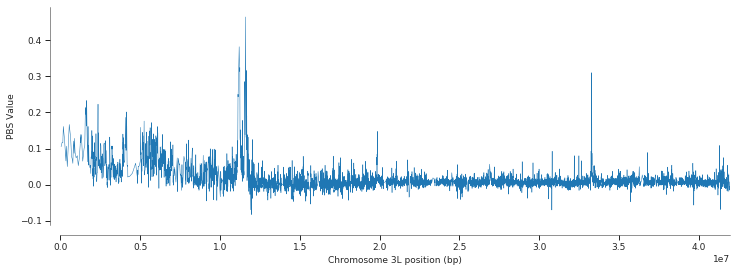

In [28]:
# Plot the test
fig, ax = pyplot.subplots(figsize=(12, 4))
sns.despine(ax=ax, offset=10)
ax.plot(x, pbs, lw=.5)
sns.despine(ax=ax, offset=10)
ax.set_ylabel("PBS Value")
ax.set_xlabel('Chromosome 3L position (bp)')
ax.set_xlim(0, pos.max())

In [124]:
pbs_bool = pbs > 0.30

In [125]:
x[pbs_bool]

array([11203978. , 11228496. , 11243170.5, 11603484. , 11647583. ,
       33281581.5])

In [130]:
np.where(x==11603484)

(array([1014]),)

In [131]:
x[1014]

11603484.0

Found these genes on vectorbase:
   - Gene: TEP3 AGAP010816 , region 11,215,193-11'220'113 (11,203,978 11,228,496)
   - Gene: AGAP010817, region 11,241,256-11,260,276 (11,243,170)
   - Gene: TEP9 AGAP010830, region 11,595,490-11,600,414 (11,603,484)
   - No genes (11,647,583)
   - Gene: CLIPA2 AGAP011790, region 33,279,935-33,281,894 (33,281,581)

----------------------------------------------

In [4]:
calldata_hap= zarr.open('data/phase2_allele_hap_count.zarr')
calldata_hap.tree()

/
 ├── 2L
 │   ├── AOcol (8906423, 2) int32
 │   ├── BFcol (8906423, 2) int32
 │   ├── BFgam (8906423, 2) int32
 │   ├── CIcol (8906423, 2) int32
 │   ├── CMgam (8906423, 2) int32
 │   ├── FRgam (8906423, 2) int32
 │   ├── GAgam (8906423, 2) int32
 │   ├── GHcol (8906423, 2) int32
 │   ├── GHgam (8906423, 2) int32
 │   ├── GM (8906423, 2) int32
 │   ├── GNcol (8906423, 2) int32
 │   ├── GNgam (8906423, 2) int32
 │   ├── GQgam (8906423, 2) int32
 │   ├── GW (8906423, 2) int32
 │   ├── KE (8906423, 2) int32
 │   └── UGgam (8906423, 2) int32
 ├── 2R
 │   ├── AOcol (12047846, 2) int32
 │   ├── BFcol (12047846, 2) int32
 │   ├── BFgam (12047846, 2) int32
 │   ├── CIcol (12047846, 2) int32
 │   ├── CMgam (12047846, 2) int32
 │   ├── FRgam (12047846, 2) int32
 │   ├── GAgam (12047846, 2) int32
 │   ├── GHcol (12047846, 2) int32
 │   ├── GHgam (12047846, 2) int32
 │   ├── GM (12047846, 2) int32
 │   ├── GNcol (12047846, 2) int32
 │   ├── GNgam (12047846, 2) int32
 │   ├── GQgam (12047846, 2) int32
 │   ├── GW (12047846, 2) int32
 │   ├── KE (12047846, 2) int32
 │   └── UGgam (12047846, 2) int32
 ├── 3L
 │   ├── AOcol (7897666, 2) int32
 │   ├── BFcol (7897666, 2) int32
 │   ├── BFgam (7897666, 2) int32
 │   ├── CIcol (7897666, 2) int32
 │   ├── CMgam (7897666, 2) int32
 │   ├── FRgam (7897666, 2) int32
 │   ├── GAgam (7897666, 2) int32
 │   ├── GHcol (7897666, 2) int32
 │   ├── GHgam (7897666, 2) int32
 │   ├── GM (7897666, 2) int32
 │   ├── GNcol (7897666, 2) int32
 │   ├── GNgam (7897666, 2) int32
 │   ├── GQgam (7897666, 2) int32
 │   ├── GW (7897666, 2) int32
 │   ├── KE (7897666, 2) int32
 │   └── UGgam (7897666, 2) int32
 └── 3R
     ├── AOcol (10752701, 2) int32
     ├── BFcol (10752701, 2) int32
     ├── BFgam (10752701, 2) int32
     ├── CIcol (10752701, 2) int32
     ├── CMgam (10752701, 2) int32
     ├── FRgam (10752701, 2) int32
     ├── GAgam (10752701, 2) int32
     ├── GHcol (10752701, 2) int32
     ├── GHgam (10752701, 2) int32
     ├── GM (10752701, 2) int32
     ├── GNcol (10752701, 2) int32
     ├── GNgam (10752701, 2) int32
     ├── GQgam (10752701, 2) int32
     ├── GW (10752701, 2) int32
     ├── KE (10752701, 2) int32
     └── UGgam (10752701, 2) int32

In [5]:
pbs = allel.pbs(calldata_hap['3R']['FRgam'], calldata_hap['3R']['BFgam'], calldata_hap['3R']['GHcol'], 50000)

In [6]:
# compute windows with equal numbers of SNPs
windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=50000)
x = np.asarray(windows).mean(axis=1) 

NameError: name 'pos' is not defined

In [ ]:
len(x), len(pbs)

NameError: name 'x' is not defined

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


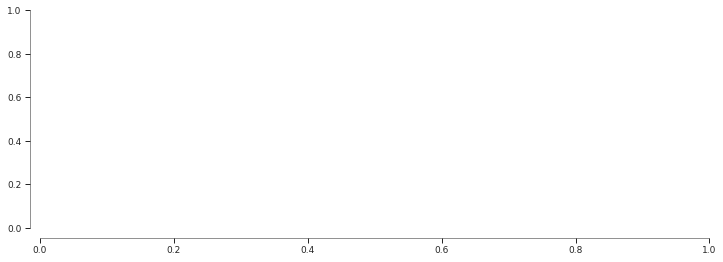

In [7]:
# Plot the test
fig, ax = plt.subplots(figsize=(12, 4))
sns.despine(ax=ax, offset=10)
ax.plot(x, pbs, lw=.5)
sns.despine(ax=ax, offset=10)
ax.set_ylabel("PBS Value")
ax.set_xlabel('Chromosome position (bp)')
ax.set_xlim(0, pos.max())

In [30]:
def pbs_plot(chrom, pop1, pop2, pop3, window_size=10000):

    fig, ax = subplots(figsize=(12, 3))
    pos = calldata_hap_phase2[chrom]['variants']['POS'][:]
    windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=window_size)
    x = np.asarray(windows).mean(axis=1) 
    y = allel.pbs(calldata_hap[chrom][pop1], calldata_hap[chrom][pop2], calldata_hap[chrom][pop3], window_size=window_size)
    sns.despine(ax=ax, offset=10)
    ax.plot(x, y, lw=.5)
    ax.set_ylabel("PBS Value", rotation=90, ha='center', va='center')
    ax.set_xlabel('Chromosome %s position (bp)' % chrom)
    ax.set_xlim(0, pos.max())
    fig.tight_layout()

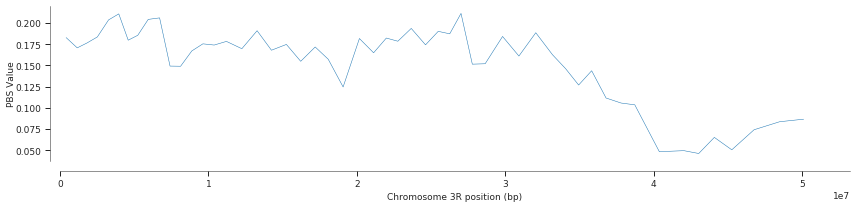

In [31]:
pbs_plot('3R', 'FRgam', 'BFgam', 'GHcol', window_size=200000)

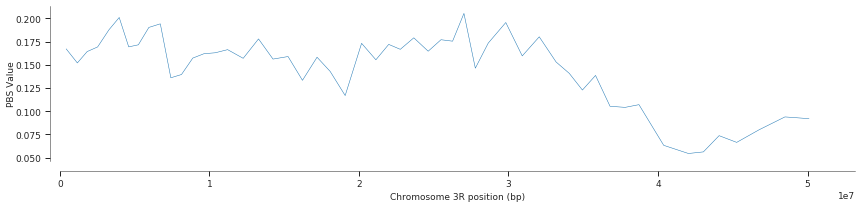

In [22]:
pbs_plot('3R', 'FRgam', 'GAgam', 'GHcol', window_size=200000)

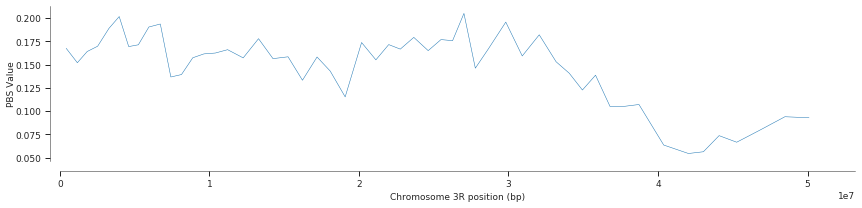

In [23]:
pbs_plot('3R', 'FRgam', 'GAgam', 'CIcol', window_size=200000)

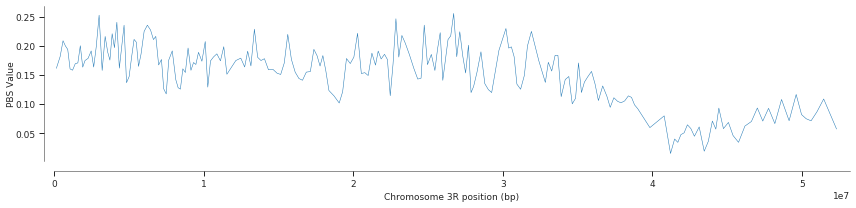

In [24]:
pbs_plot('3R', 'FRgam', 'BFgam', 'GHcol', window_size=50000)

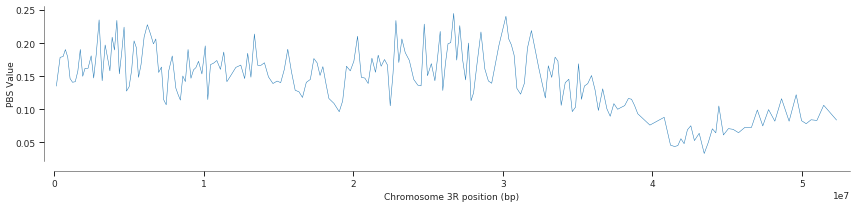

In [25]:
pbs_plot('3R', 'FRgam', 'GAgam', 'GHcol', window_size=50000)

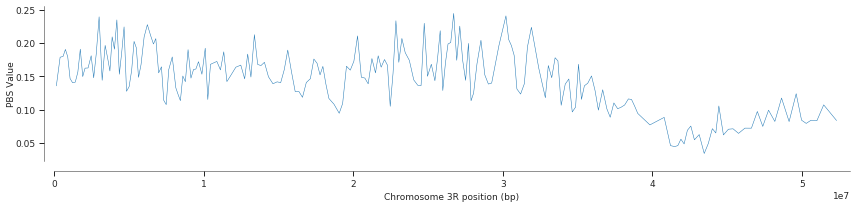

In [26]:
pbs_plot('3R', 'FRgam', 'GAgam', 'CIcol', window_size=50000)

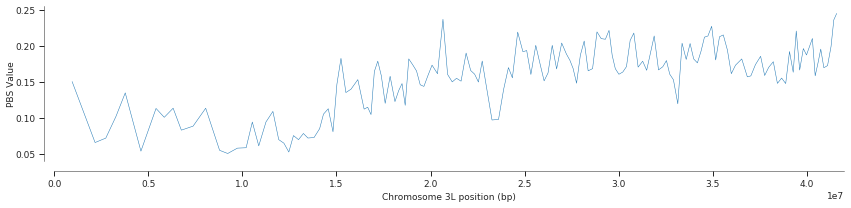

In [27]:
pbs_plot('3L', 'FRgam', 'BFgam', 'GHcol', window_size=50000)

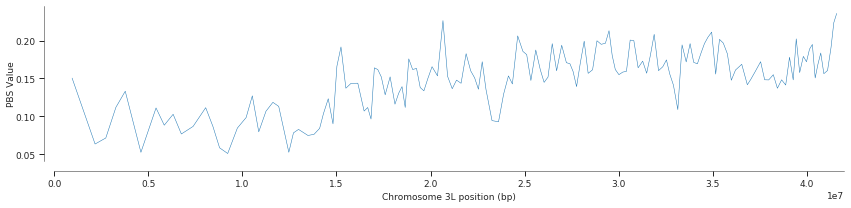

In [28]:
pbs_plot('3L', 'FRgam', 'GAgam', 'GHcol', window_size=50000)

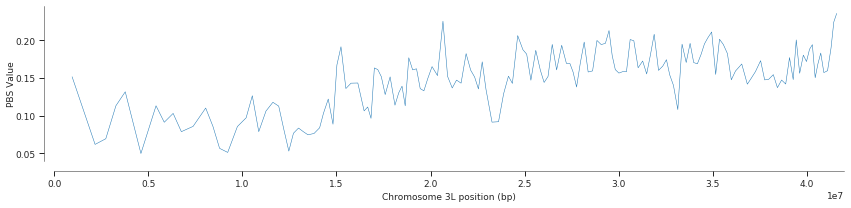

In [29]:
pbs_plot('3L', 'FRgam', 'GAgam', 'CIcol', window_size=50000)

-------------------------------------

## Using <i>christiy</i> as outgroup

In [9]:
calldata_chri= h5py.File('chri_ac_phase2_map.h5', mode='r')

In [10]:
len(calldata_chri['3L']), len(ac_subpops['BFgam'])

(6780124, 7897666)

In [11]:
pos_phase1 = allel.SortedIndex(calldata_phase1['3L']["variants/POS"][:])
pos_phase2 = allel.SortedIndex(calldata_phase2['3L']["variants/POS"][:])
loc1, loc2 = pos_phase2.locate_intersection(pos_phase1)
pos_p2_sel = pos_phase2.compress(loc1)

In [12]:
geno_p2_subset = genotypes_phase2.subset(sel0=loc1, sel1=pop_select)

In [13]:
grp = pop_subset.groupby("population")
grp_indices = grp.indices
ac_subpops = geno_p2_subset.count_alleles_subpops(grp_indices)

In [14]:
len(calldata_chri['3L']), len(ac_subpops['BFgam'])

(6780124, 6780124)

In [15]:
calldata_chri['3L']

<HDF5 dataset "3L": shape (6780124, 2), type "<i4">

In [16]:
pbs = allel.pbs(ac_subpops['BFcol'], ac_subpops['BFgam'], calldata_chri['3L'], 1000)

/opt/conda/lib/python3.6/site-packages/allel/stats/fst.py:622: RuntimeWarning: invalid value encountered in true_divide
  fst = num_sum / den_sum


In [17]:
# compute windows with equal numbers of SNPs
windows = allel.moving_statistic(pos_p2_sel, statistic=lambda v: [v[0], v[-1]], size=1000)
x = np.asarray(windows).mean(axis=1) 

In [18]:
len(x), len(pbs)

(6780, 6780)

(0, 41956551)

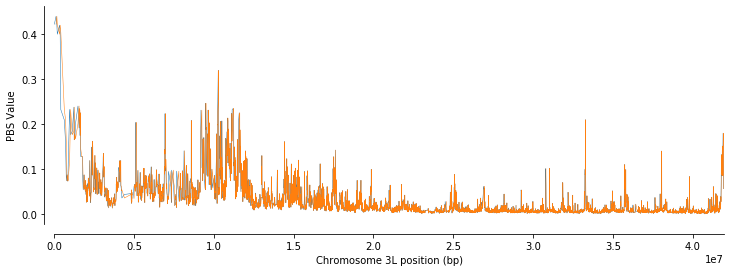

In [20]:
# Plot the test
fig, ax = pyplot.subplots(figsize=(12, 4))
sns.despine(ax=ax, offset=10)
ax.plot(windows, pbs, lw=.5)
ax.set_ylabel("PBS Value")
ax.set_xlabel('Chromosome 3L position (bp)')
ax.set_xlim(0, pos_p2_sel.max())